## Practical Work 2

### Auther : Fatema Samir Ahmed
### Date : 22/2/2022 --- Last Version ---

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
X = np.linspace(0, 20)
print('X :\n',X)

X :
 [ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]


In [3]:
a = -2
b = 1
Y = a*X + b
print('Y :\n',Y)

Y :
 [  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.40816327 -20.2244898  -21.04081633 -21.85714286 -22.67346939
 -23.48979592 -24.30612245 -25.12244898 -25.93877551 -26.75510204
 -27.57142857 -28.3877551  -29.20408163 -30.02040816 -30.83673469
 -31.65306122 -32.46938776 -33.28571429 -34.10204082 -34.91836735
 -35.73469388 -36.55102041 -37.36734694 -38.18367347 -39.        ]


<function matplotlib.pyplot.show(*args, **kw)>

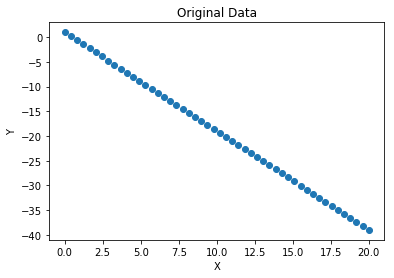

In [4]:
# Draw Original Data 
plt.scatter(X,Y)
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [5]:
# --- GD for single variable linear regression stop criteria ---

# defintion Hyposis function 
def H (Theta0, Theta1, X):
    h = Theta0 + Theta1*X
#     print(h)
    return h # return array  


# Define Cost Function
def Cost (Theta_0, Theta_1,X,Y):
    z = H(Theta_0, Theta_1, X) - Y 
    return (z @z )/(2*len(X))


def GD_single( X, Y, alpha, Max_iteration):
    # define Array cost to save All costs
    cost_val = []
    # define Array Y_predict to save All hypothesis output
    Y_predict = []
    
    # define Array Theta0 to save All Theta0
    All_Theta_0 = []
    # define Array Theta1 to save All Theta1
    All_Theta_1 = []
    
    # inilaize Theta_0 and Theta_1 to Zero
    Theta_0, Theta_1 = 0, 0
    epoch = 0
    for i in range(Max_iteration):
        # Append Theta_0 and Theta_1 to save All 
        All_Theta_0.append(Theta_0)
        All_Theta_1.append(Theta_1)
        
        # save Cost 
        cost_val.append(Cost(Theta_0, Theta_1,X,Y))
        
        # calc hypothesis
        Y_predict = H(Theta_0, Theta_1, X) # return array
        Z = Y_predict - Y
        GR_theta0  = (np.sum(Z))/ len(X)
        GR_theta1  = (np.sum(Z * X))/ len(X)
        
        # Update Theta0 and Theta1
        Theta_0 = Theta_0 - alpha*GR_theta0
        Theta_1 = Theta_1 - alpha*GR_theta1
        if (abs(cost_val[i]-cost_val[i-1] ) < 0.001 and i>0):
            epoch = i+2
            break
    # save last update
    All_Theta_0.append(Theta_0)
    All_Theta_1.append(Theta_1)
    cost_val.append(Cost(Theta_0, Theta_1,X,Y))
    
    return All_Theta_0, All_Theta_1, cost_val, Y_predict, epoch


In [32]:
# z = np.zeros(25).reshape(-1,1)
# n =[]
# print(z.shape)
# n.append((z*z).sum())
# print((z*z).sum()+1)
# n.append((z.T@z)+1)
# print((z.T@z).shape)
# print(np.sum(n))
# print('\n',z[2:6])
# print(len(z))

#### Try your function with any input parameterss of your choice.

In [6]:

alpha = 0.001
iteration = 100
Theta_0_all, Theta_1_all, loss , Y_predict, epochs = GD_single( X, Y, alpha, iteration) 

#### Calculate r2 score

In [7]:
from sklearn.metrics import r2_score
r2 = r2_score(Y,Y_predict)
print(r2) # high Score because data not shufle

0.9975950054190024


In [8]:
print(len(loss),"  number of epochs : ",epochs )

42   number of epochs :  42


#### Plot loss vs. epochs

<function matplotlib.pyplot.show(*args, **kw)>

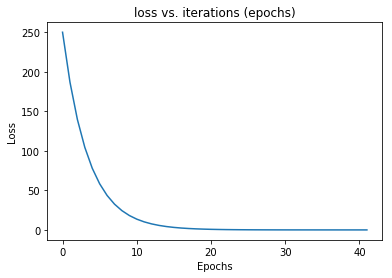

In [9]:
plt.plot( np.arange(epochs),loss)
plt.title('loss vs. iterations (epochs)')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

<function matplotlib.pyplot.show(*args, **kw)>

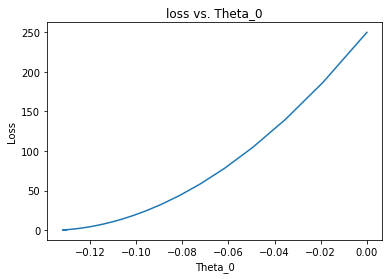

In [10]:
plt.plot(Theta_0_all,loss)
plt.title('loss vs. Theta_0')
plt.ylabel('Loss')
plt.xlabel('Theta_0')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

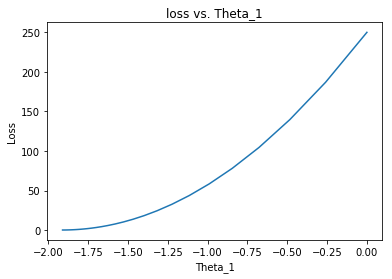

In [11]:
plt.plot(Theta_1_all,loss)
plt.title('loss vs. Theta_1')
plt.ylabel('Loss')
plt.xlabel('Theta_1')
plt.show

#### Plot all regression lines till converge

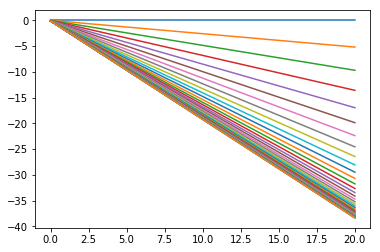

In [12]:
for theta0 , theta1 in zip(Theta_0_all,Theta_1_all):
    y_hat = H (theta0, theta1, X)
    plt.plot(X,y_hat)

#### Plot the best regression line

<function matplotlib.pyplot.show(*args, **kw)>

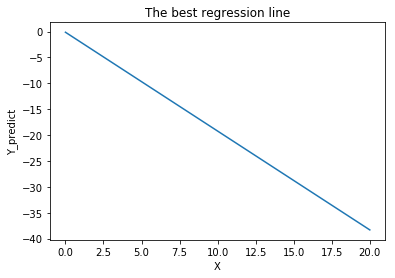

In [13]:

plt.plot(X, Y_predict)
plt.title('The best regression line')
plt.xlabel('X')
plt.ylabel('Y_predict')
plt.show

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [14]:
# different learning rate and number of iterations
alpha = 0.01
iteration = 1000
Theta_0_all, Theta_1_all, loss , Y_predict, epochs = GD_single( X, Y, alpha, iteration) 

In [15]:
from sklearn.metrics import r2_score
r2 = r2_score(Y,Y_predict)
print(r2)

0.9976746549092759


<function matplotlib.pyplot.show(*args, **kw)>

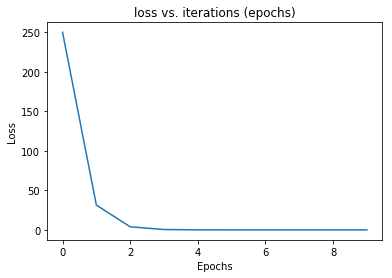

In [16]:
plt.plot( np.arange(epochs),loss)
plt.title('loss vs. iterations (epochs)')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

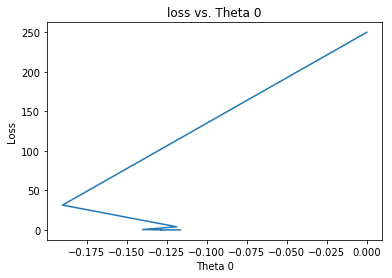

In [17]:
plt.plot(Theta_0_all,loss)
plt.title('loss vs. Theta 0')
plt.ylabel('Loss')
plt.xlabel('Theta 0')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

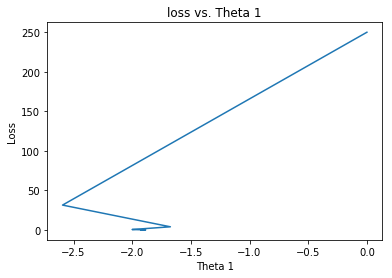

In [18]:
plt.plot(Theta_1_all,loss)
plt.title('loss vs. Theta 1')
plt.ylabel('Loss')
plt.xlabel('Theta 1')
plt.show

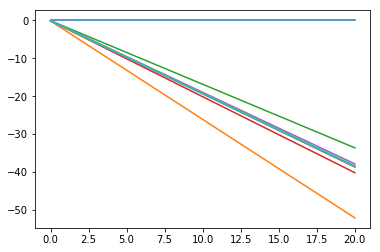

In [19]:
for theta0 , theta1 in zip(Theta_0_all,Theta_1_all):
    y_hat = H (theta0, theta1, X)
    plt.plot(X,y_hat)

<function matplotlib.pyplot.show(*args, **kw)>

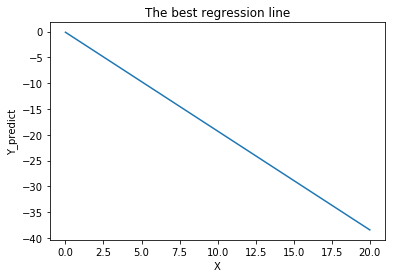

In [20]:
plt.plot(X, Y_predict)
plt.title('The best regression line')
plt.xlabel('X')
plt.ylabel('Y_predict')
plt.show

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [4]:
# --- GD Mini-Batch for single variable linear regression without shuffling the data with stop criteria---

# defintion Hyposis function 
def H (Theta0, Theta1, X_mini):
    h = Theta0 + Theta1*X_mini
    return h

# Define Cost Function
def Cost (Theta_0, Theta_1,Xmin,Ymin):
    z = H(Theta_0, Theta_1, Xmin) - Ymin
    return (z @z )/(2*len(Xmin))


def Mini_Batch_GD_single( X, Y, alpha, Max_iteration, batch_size):
    # define Array cost to save All costs
    cost_val = []
    lose_per_epoch = []
    # define Array Theta0 to save All Theta0
    All_Theta_0 = []
    # define Array Theta1 to save All Theta1
    All_Theta_1 = []
    
    # inilaize Theta_0 and Theta_1 to Zero
    Theta_0, Theta_1 = 0, 0
    epoch = 0
    num_batches = len(X)//batch_size
    for i in range(Max_iteration):
        for batch in range(num_batches+1):

            x_mini = X[batch*batch_size:(batch+1)*batch_size]
            y_mini = Y[batch*batch_size:(batch+1)*batch_size]
     
            # calc hypothesis
            Z = H(Theta_0, Theta_1, x_mini) - y_mini
            GR_theta0  = (np.sum(Z))/ len(x_mini)
            GR_theta1  = (np.sum(Z * x_mini))/ len(x_mini)

            # Update Theta0 and Theta1
            Theta_0 = Theta_0 - alpha*GR_theta0
            Theta_1 = Theta_1 - alpha*GR_theta1
            # Append Theta_0 and Theta_1 to save All 
            All_Theta_0.append(Theta_0)
            All_Theta_1.append(Theta_1)
            # save Cost 
            cost_val.append(Cost(Theta_0, Theta_1,x_mini,y_mini))
            epoch +=1
        lose_per_epoch.append(Cost(Theta_0, Theta_1,x_mini,y_mini))
        if (abs(lose_per_epoch[i]-lose_per_epoch[i-1] ) < 0.001 and i>0):
            break

    
    return All_Theta_0, All_Theta_1, cost_val,lose_per_epoch,  epoch


# Test mini-batch GD single Variable without shuffle with stop criteria

In [5]:
X = np.linspace(0, 20)
print('X :\n',X)
a = -2
b = 1
Y = a*X + b
print('Y :\n',Y)

X :
 [ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
Y :
 [  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.40816327 -20.2244898  -21.04081633 -21.8571428

In [13]:
#Test mini-batch GD single Variable without shuffle
alpha = 0.001
epo = 100
btatch_size = 4
Theta_0_mini_batch, Theta_1_mini_batch, loss_mini_batch, loss_mini_batch_p_epoch , epochs_mini = Mini_Batch_GD_single( X, Y, alpha, iteration,btatch_size)
Y_Hat = Theta_0_mini_batch[-1]+Theta_1_mini_batch[-1]*X

In [14]:
from sklearn.metrics import r2_score
r2 = r2_score(Y,Y_Hat)
print(r2)

0.9972734321813201


In [15]:
print(len(loss_mini_batch),"\t",epochs_mini)

78 	 78


<function matplotlib.pyplot.show(*args, **kw)>

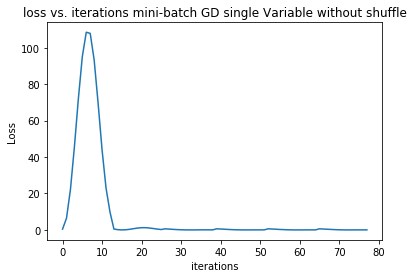

In [18]:
plt.plot( np.arange(epochs_mini),loss_mini_batch)
plt.title('loss vs. iterations mini-batch GD single Variable without shuffle')
plt.ylabel('Loss')
plt.xlabel('iterations')
plt.show

## Plote Loss with Epochs mini-batch GD single Variable without shuffle Data with Stop criteria

<function matplotlib.pyplot.show(*args, **kw)>

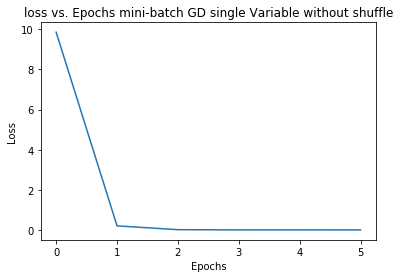

In [65]:
## Plote Loss with Epochs mini-batch GD single Variable with shuffle Data without Stop criteria
plt.plot( loss_mini_batch_p_epoch)
plt.title('loss vs. Epochs mini-batch GD single Variable without shuffle')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

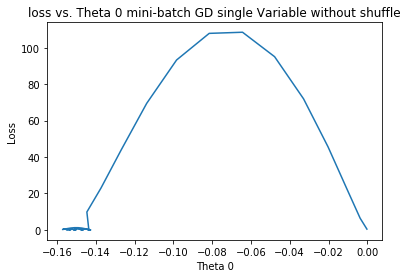

In [20]:
plt.plot(Theta_0_mini_batch,loss_mini_batch)
plt.title('loss vs. Theta 0 mini-batch GD single Variable without shuffle')
plt.ylabel('Loss')
plt.xlabel('Theta 0')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

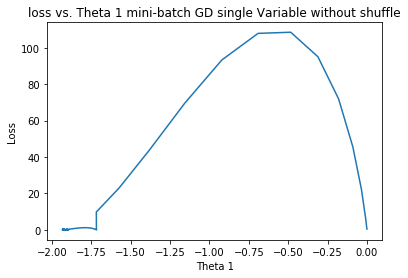

In [21]:
plt.plot(Theta_1_mini_batch,loss_mini_batch)
plt.title('loss vs. Theta 1 mini-batch GD single Variable without shuffle')
plt.ylabel('Loss')
plt.xlabel('Theta 1')
plt.show

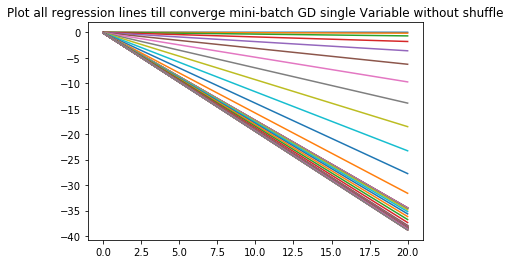

In [22]:
for theta0 , theta1 in zip(Theta_0_mini_batch,Theta_1_mini_batch):
    y_hat = H (theta0, theta1, X)
    plt.plot(X,y_hat)
    plt.title('Plot all regression lines till converge mini-batch GD single Variable without shuffle')

<function matplotlib.pyplot.show(*args, **kw)>

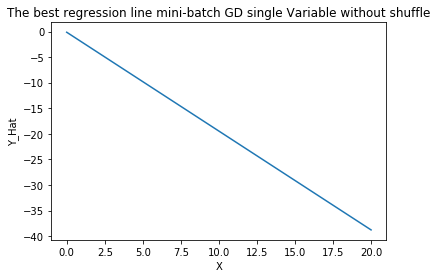

In [23]:
plt.plot(X, Y_Hat)
plt.title('The best regression line mini-batch GD single Variable without shuffle')
plt.xlabel('X')
plt.ylabel('Y_Hat')
plt.show

# Test mini-batch GD single Variable with shuffle Data

In [43]:
# --- GD Mini-Batch for single variable linear regression  with suffle ---

# defintion Hyposis function 
def H (Theta0, Theta1, X_mini):
    h = Theta0 + Theta1*X_mini
    return h

# Define Cost Function
def Cost (Theta_0, Theta_1,Xmin,Ymin):
    z = H(Theta_0, Theta_1, Xmin) - Ymin
    return (z @z )/(2*len(Xmin))


def Mini_Batch_GD_single_Suffle( X, Y, alpha, Max_iteration, batch_size):
    # define Array cost to save All costs
    cost_val = []
    lose_per_epoch = []
    # define Array Theta0 to save All Theta0
    All_Theta_0 = []
    # define Array Theta1 to save All Theta1
    All_Theta_1 = []
    
    # inilaize Theta_0 and Theta_1 to Zero
    Theta_0, Theta_1 = 0, 0
    epoch = 0
    num_batches = len(X)//batch_size
    for i in range(Max_iteration):
        # Shuffle Data
        X,Y = shuffle(X,Y)
        
        for batch in range(num_batches+1):

            x_mini = X[batch*batch_size:(batch+1)*batch_size]
            y_mini = Y[batch*batch_size:(batch+1)*batch_size]

            # calc hypothesis
            Z = H(Theta_0, Theta_1, x_mini) - y_mini
            GR_theta0  = (np.sum(Z))/ len(x_mini)
            GR_theta1  = (np.sum(Z * x_mini))/ len(x_mini)

            # Update Theta0 and Theta1
            Theta_0 = Theta_0 - alpha*GR_theta0
            Theta_1 = Theta_1 - alpha*GR_theta1
            epoch +=1
            # Append Theta_0 and Theta_1 to save All 
            All_Theta_0.append(Theta_0)
            All_Theta_1.append(Theta_1)
            # save Cost 
            cost_val.append(Cost(Theta_0, Theta_1,x_mini,y_mini))
        lose_per_epoch.append(Cost(Theta_0, Theta_1,x_mini,y_mini))
        if (abs(lose_per_epoch[i]-lose_per_epoch[i-1] ) < 0.001 and i>0):
            break

        # save last update

    
    return All_Theta_0, All_Theta_1, cost_val,lose_per_epoch,  epoch


In [44]:
from sklearn.utils import shuffle
X = np.linspace(0, 20)
print('X :\n',X)
a = -2
b = 1
Y = a*X + b
print('Y :\n',Y)
X,Y = shuffle(X,Y)

X :
 [ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
Y :
 [  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.40816327 -20.2244898  -21.04081633 -21.8571428

In [53]:
#Test mini-batch GD single Variable with shuffle
from sklearn.utils import shuffle
alpha = 0.001
epoch = 100
btatch_size = 4
Theta_0_mini_shuffle, Theta_1_mini_shuffle, loss_mini_shuffle,lossperepo_mini_shuffle, iterr_mini_shuffle = Mini_Batch_GD_single_Suffle( X, Y, alpha, iteration,btatch_size)
Y_Hat = Theta_0_mini_shuffle[-1]+Theta_1_mini_shuffle[-1]*X

In [54]:
from sklearn.metrics import r2_score
r2 = r2_score(Y,Y_Hat)
print(r2)

0.9983186044906432


In [55]:
print(len(loss_mini_shuffle),"\t",iterr_mini_shuffle)

702 	 702


<function matplotlib.pyplot.show(*args, **kw)>

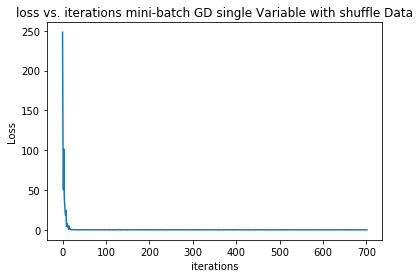

In [56]:
plt.plot( np.arange(iterr_mini_shuffle),loss_mini_shuffle)
plt.title('loss vs. iterations mini-batch GD single Variable with shuffle Data')
plt.ylabel('Loss')
plt.xlabel('iterations')
plt.show

## Plote Loss with Epochs mini-batch GD single Variable with shuffle Data with Stop criteria

<function matplotlib.pyplot.show(*args, **kw)>

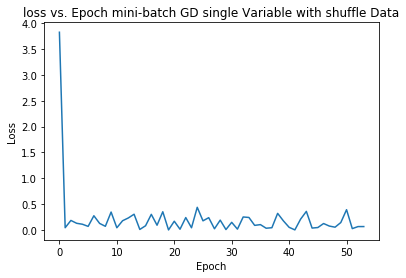

In [60]:
#Plote Loss with Epochs mini-batch GD single Variable with shuffle Data with Stop criteria
plt.plot( lossperepo_mini_shuffle)
plt.title('loss vs. Epoch mini-batch GD single Variable with shuffle Data')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

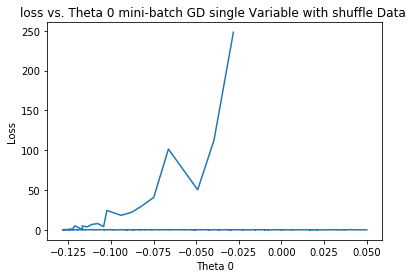

In [61]:
plt.plot(Theta_0_mini_shuffle,loss_mini_shuffle)
plt.title('loss vs. Theta 0 mini-batch GD single Variable with shuffle Data ')
plt.ylabel('Loss')
plt.xlabel('Theta 0')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

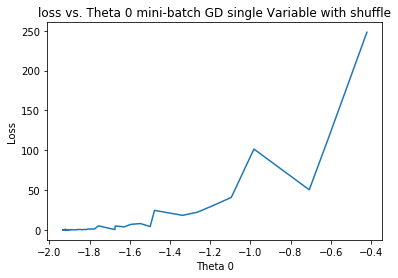

In [62]:
plt.plot(Theta_1_mini_shuffle,loss_mini_shuffle)
plt.title('loss vs. Theta 0 mini-batch GD single Variable with shuffle')
plt.ylabel('Loss')
plt.xlabel('Theta 0')
plt.show

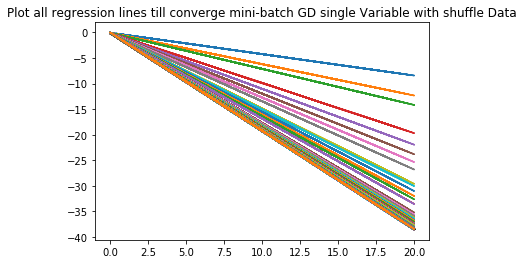

In [63]:
for theta0 , theta1 in zip(Theta_0_mini_shuffle,Theta_1_mini_shuffle):
    y_hat = H (theta0, theta1, X)
    plt.plot(X,y_hat)
    plt.title('Plot all regression lines till converge mini-batch GD single Variable with shuffle Data')

<function matplotlib.pyplot.show(*args, **kw)>

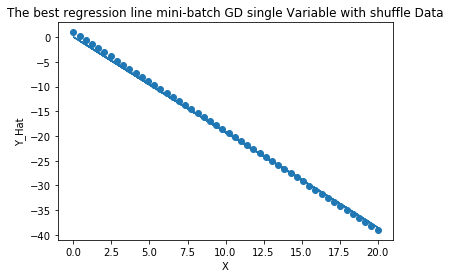

In [64]:
plt.scatter(X,Y)
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show
plt.plot(X, Y_Hat)
plt.title('The best regression line mini-batch GD single Variable with shuffle Data')
plt.xlabel('X')
plt.ylabel('Y_Hat')
plt.show

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [45]:
# --- Stochastic GD for single variable linear regression ---

# defintion Hyposis function Stochastic GD
def H (Theta0, Theta1, X):
    h = Theta0 + Theta1*X
#     print(h)
    return h


# Define Cost Function of Stochastic GD
def Cost_point (Theta_0, Theta_1,x,y):
    z = H(Theta_0, Theta_1, x) - y # return point 
    return (z*z)/2


def Stochastic_GD_single( X, Y, alpha, epochs):
    # define Array cost to save All costs
    cost_val = []
    loss_per_epoch = []
    # define Array Theta0 to save All Theta0
    All_Theta_0 = []
    # define Array Theta1 to save All Theta1
    All_Theta_1 = []
    
    # inilaize Theta_0 and Theta_1 to Zero
    Theta_0, Theta_1 = 0, 0
    epo = 0
    for e in range(epochs):
        for i in range(len(X)):

            # calc hypothesis
            Y_predict = H(Theta_0, Theta_1, X[i]) # return point
            Z = Y_predict - Y[i]
            GR_theta0  = Z
            GR_theta1  = Z*X[i]

            # Update Theta0 and Theta1
            Theta_0 = Theta_0 - alpha*GR_theta0
            Theta_1 = Theta_1 - alpha*GR_theta1
            epo +=1
                    # save last update
            All_Theta_0.append(Theta_0)
            All_Theta_1.append(Theta_1)
            cost_val.append(Cost_point(Theta_0, Theta_1,X[i],Y[i]))
        loss_per_epoch.append(Cost_point(Theta_0, Theta_1,X[i],Y[i]))
#         if (abs(loss_per_epoch[e]-loss_per_epoch[e-1] ) < 0.001 and e>0):
#             break
#         if (abs(np.linalg.norm([All_Theta_0[e*(len(X)-1)],All_Theta_0[e*(len(X)-1)]])-np.linalg.norm([All_Theta_0[(e-1)*(len(X)-1)],All_Theta_0[(e-1)*(len(X)-1)]]))<.001 and e>0):
#             break

    return All_Theta_0, All_Theta_1, cost_val, loss_per_epoch,epo


#  --- Stochastic GD for single variable linear regression without shuffling the data  ---

In [16]:
X = np.linspace(0, 20)
print('X :\n',X)
a = -2
b = 1
Y = a*X + b
print('\nY :\n',Y)

X :
 [ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]

Y :
 [  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.40816327 -20.2244898  -21.04081633 -21.857142

In [46]:
#  --- Stochastic GD for single variable linear regression without shuffling the data  ---

alpha = 0.01
epochs = 10
Theta_0_all_Stoch, Theta_1_all_Stoch, loss_stoch_I, loss_stoch_epoch, epo_stoch  = Stochastic_GD_single( X, Y, alpha, epochs) 
Y_predict_stoch = Theta_0_all_Stoch[-1] + Theta_1_all_Stoch[-1] * X
# print(len(X))

In [47]:
from sklearn.metrics import r2_score
r2_stoch = r2_score(Y,Y_predict_stoch)
print(r2_stoch) # high Score because data not shufle

0.9984052371157826


# Plot Theta_0 vs. loss for Stochastic GD for single variable linear regression without shuffling the data

<function matplotlib.pyplot.show(*args, **kw)>

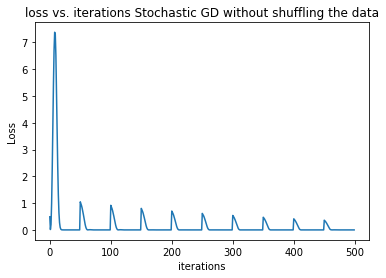

In [49]:
#P lot loss vs. epochs
# print(len(loss_stoch_I))
plt.plot( np.arange(epo_stoch),loss_stoch_I)
plt.title('loss vs. iterations Stochastic GD without shuffling the data')
plt.ylabel('Loss')
plt.xlabel('iterations')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

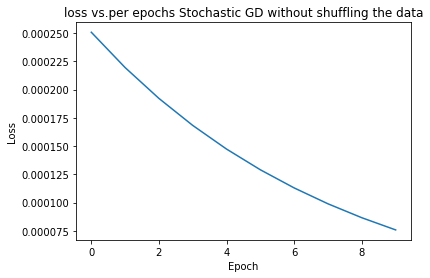

In [51]:
#P lot loss vs. epochs
plt.plot( np.arange(epochs),loss_stoch_epoch)
plt.title('loss vs.per epochs Stochastic GD without shuffling the data')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

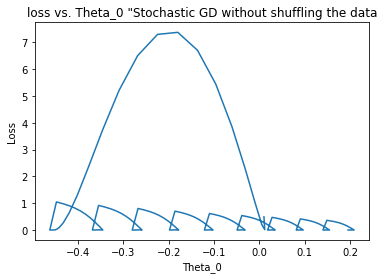

In [53]:
# Plot Theta_0 vs. loss for Stochastic GD for single variable linear regression without shuffling the data
plt.plot(Theta_0_all_Stoch,loss_stoch_I)
plt.title('loss vs. Theta_0 "Stochastic GD without shuffling the data')
plt.ylabel('Loss')
plt.xlabel('Theta_0')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

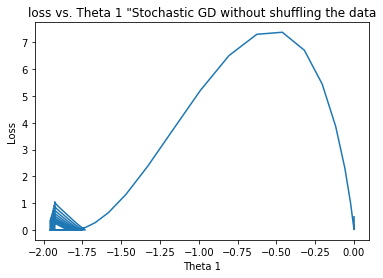

In [54]:
# Plot Theta_0 vs. loss for Stochastic GD for single variable linear regression without shuffling the data
plt.plot(Theta_1_all_Stoch,loss_stoch_I)
plt.title('loss vs. Theta 1 "Stochastic GD without shuffling the data')
plt.ylabel('Loss')
plt.xlabel('Theta 1')
plt.show

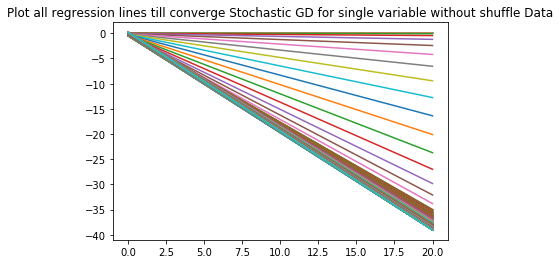

In [55]:
for theta0 , theta1 in zip(Theta_0_all_Stoch,Theta_1_all_Stoch):
    y_hat = H (theta0, theta1, X)
    plt.plot(X,y_hat)
    plt.title('Plot all regression lines till converge Stochastic GD for single variable without shuffle Data')

<function matplotlib.pyplot.show(*args, **kw)>

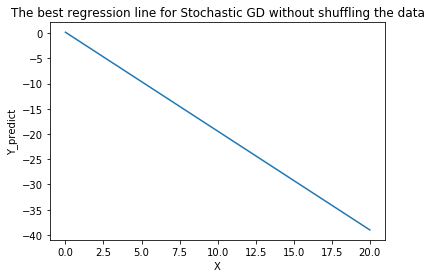

In [56]:
plt.show
plt.plot(X, Y_predict_stoch)
plt.title('The best regression line for Stochastic GD without shuffling the data')
plt.xlabel('X')
plt.ylabel('Y_predict')
plt.show

#  --- Stochastic GD for single variable linear regression with shuffling the data  with stop criteria ---

In [19]:
# --- Stochastic GD for single variable linear regression with shuffling the data  stop criteria  ---
from sklearn.utils import shuffle
# defintion Hyposis function Stochastic GD
def H (Theta0, Theta1, X):
    h = Theta0 + Theta1*X
#     print(h)
    return h


# Define Cost Function of Stochastic GD
def Cost_point (Theta_0, Theta_1,x,y):
    z = H(Theta_0, Theta_1, x) - y # return point 
    return (z*z)/2


def Stochastic_GD_single_suffle( X, Y, alpha, epochs):
    # define Array cost to save All costs
    cost_val = []
    loss_per_epoch = []
    # define Array Theta0 to save All Theta0
    All_Theta_0 = []
    # define Array Theta1 to save All Theta1
    All_Theta_1 = []
    
    # inilaize Theta_0 and Theta_1 to Zero
    Theta_0, Theta_1 = 0, 0
    epo = 0
    for e in range(epochs):
        X,Y = shuffle(X,Y)
        for i in range(len(X)):
            # Append Theta_0 and Theta_1 to save All 
#             All_Theta_0.append(Theta_0)
#             All_Theta_1.append(Theta_1)
            # save Cost 
#             cost_val.append(Cost_point(Theta_0, Theta_1,X[i],Y[i]))

            # calc hypothesis
            Y_predict = H(Theta_0, Theta_1, X[i]) # return point
            Z = Y_predict - Y[i]
            GR_theta0  = Z
            GR_theta1  = Z*X[i]

            # Update Theta0 and Theta1
            Theta_0 = Theta_0 - alpha*GR_theta0
            Theta_1 = Theta_1 - alpha*GR_theta1
            epo +=1
           # Append Theta_0 and Theta_1 to save All 
            All_Theta_0.append(Theta_0)
            All_Theta_1.append(Theta_1)
            cost_val.append(Cost_point(Theta_0, Theta_1,X[i],Y[i]))
        loss_per_epoch.append(Cost_point(Theta_0, Theta_1,X[i],Y[i]))
        if (abs(loss_per_epoch[e]-loss_per_epoch[e-1] ) < 0.001 and e>0):
            break
#         if (abs(np.linalg.norm([All_Theta_0[e*(len(X)-1)],All_Theta_0[e*(len(X)-1)]])-np.linalg.norm([All_Theta_0[(e-1)*(len(X)-1)],All_Theta_0[(e-1)*(len(X)-1)]]))<.001 and e>0):
#             break

    return All_Theta_0, All_Theta_1, cost_val, loss_per_epoch,epo


In [20]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.utils import shuffle
X = np.linspace(0, 20)
a = -2
b = 1
Y = a*X + b
X,Y = shuffle(X,Y)
print('X after suffle :\n',X)
print('\nY after suffle :\n',Y)


X after suffle :
 [ 5.71428571 13.06122449  1.2244898  15.91836735 12.24489796 15.10204082
  8.57142857  3.26530612 16.73469388  2.04081633 14.28571429  4.08163265
  9.3877551   2.85714286  8.16326531 17.55102041 11.02040816 19.18367347
  4.89795918  1.63265306 17.14285714  2.44897959  6.93877551 12.65306122
 16.32653061 13.46938776  0.81632653 13.87755102 20.         15.51020408
 11.42857143 18.36734694  5.30612245  7.34693878 19.59183673  8.97959184
  9.79591837  0.          3.67346939 17.95918367  7.75510204 14.69387755
 10.6122449  11.83673469  0.40816327 10.20408163 18.7755102   6.53061224
  4.48979592  6.12244898]

Y after suffle :
 [-10.42857143 -25.12244898  -1.44897959 -30.83673469 -23.48979592
 -29.20408163 -16.14285714  -5.53061224 -32.46938776  -3.08163265
 -27.57142857  -7.16326531 -17.7755102   -4.71428571 -15.32653061
 -34.10204082 -21.04081633 -37.36734694  -8.79591837  -2.26530612
 -33.28571429  -3.89795918 -12.87755102 -24.30612245 -31.65306122
 -25.93877551  -0.63265

In [41]:
#  --- Stochastic GD for single variable linear regression with shuffling the data  ---

alpha = 0.01
epochs = 10
Theta_0_all_Stoch, Theta_1_all_Stoch, loss_stoch,loss_stoch_epoch, iterr  = Stochastic_GD_single_suffle( X, Y, alpha, epochs) 
Y_predict_stoch = Theta_0_all_Stoch[-1] + Theta_1_all_Stoch[-1] * X
# print(Y_predict_stoch)

In [42]:
from sklearn.metrics import r2_score
r2_stoch = r2_score(Y,Y_predict_stoch)
print(r2_stoch) # suffle Data

0.9986495207641631


<function matplotlib.pyplot.show(*args, **kw)>

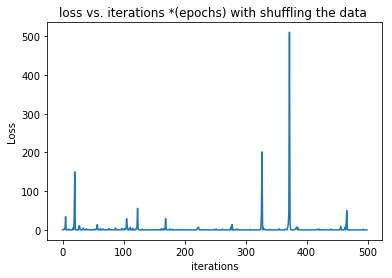

In [43]:
#P lot loss vs. iterations
# print(len(loss_stoch))
plt.plot( np.arange(iterr),loss_stoch)
plt.title('loss vs. iterations *(epochs) with shuffling the data ')
plt.ylabel('Loss')
plt.xlabel('iterations')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

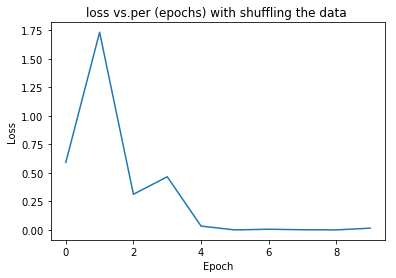

In [44]:
#P lot loss vs. epochs
plt.plot( np.arange(epochs),loss_stoch_epoch)
plt.title('loss vs.per (epochs) with shuffling the data ')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

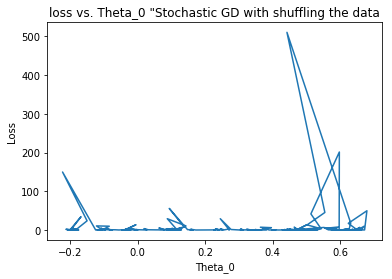

In [45]:
# Plot Theta_0 vs. loss for Stochastic GD for single variable linear regression with shuffling the data
plt.plot(Theta_0_all_Stoch,loss_stoch)
plt.title('loss vs. Theta_0 "Stochastic GD with shuffling the data')
plt.ylabel('Loss')
plt.xlabel('Theta_0')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

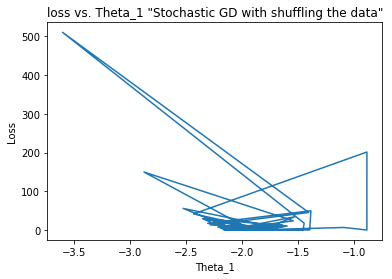

In [46]:
# Plot Theta_1 vs. loss for Stochastic GD for single variable linear regression with shuffling the data
plt.plot(Theta_1_all_Stoch,loss_stoch)
plt.title('loss vs. Theta_1 "Stochastic GD with shuffling the data"')
plt.ylabel('Loss')
plt.xlabel('Theta_1')
plt.show

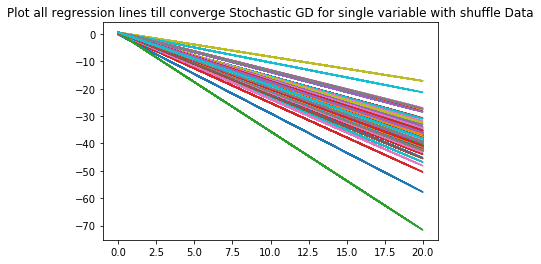

In [47]:
for theta0 , theta1 in zip(Theta_0_all_Stoch,Theta_1_all_Stoch):
    y_hat = H (theta0, theta1, X)
    plt.plot(X,y_hat)
    plt.title('Plot all regression lines till converge Stochastic GD for single variable with shuffle Data')

<function matplotlib.pyplot.show(*args, **kw)>

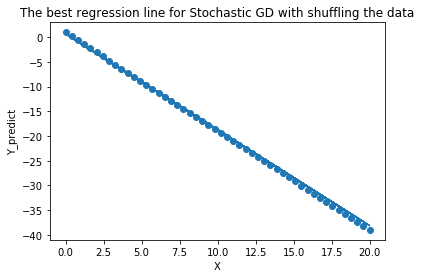

In [48]:
plt.scatter(X, Y)
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show

plt.plot(X, Y_predict_stoch)
plt.title('The best regression line for Stochastic GD with shuffling the data')
plt.xlabel('X')
plt.ylabel('Y_predict')
plt.show

Plot Theta_0 vs. loss and Theta_1 vs. loss for Stochastic GD for single variable linear regression with shuffling the data

# Same Shuffle Data with changing in alpha "different learning rate"

In [50]:
#  --- Stochastic GD for single variable linear regression with shuffling the data  ---

alpha = 0.001
epochs = 10
Theta_0_all_Stoch, Theta_1_all_Stoch, loss_stoch, loss_stoch_epoch, iterr  = Stochastic_GD_single_suffle( X, Y, alpha, epochs) 
Y_predict_stoch = Theta_0_all_Stoch[-1] + Theta_1_all_Stoch[-1] * X
# print(Y_predict_stoch)

In [51]:
# changeing in alpha to 0.001
from sklearn.metrics import r2_score
r2_stoch = r2_score(Y,Y_predict_stoch)
print(r2_stoch) # suffle Data

0.9981487076466976


<function matplotlib.pyplot.show(*args, **kw)>

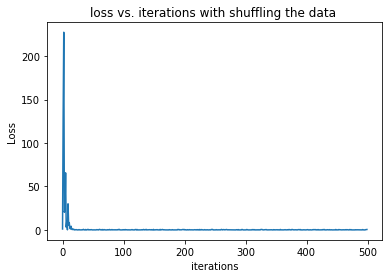

In [53]:
# Plot loss vs. iterations with changeing in alpha to 0.001

plt.plot( np.arange(iterr),loss_stoch)
plt.title('loss vs. iterations with shuffling the data ')
plt.ylabel('Loss')
plt.xlabel('iterations')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

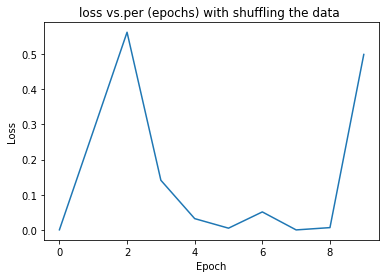

In [57]:
#P lot loss vs. epochs
plt.plot( np.arange(epochs),loss_stoch_epoch)
plt.title('loss vs.per (epochs) with shuffling the data ')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

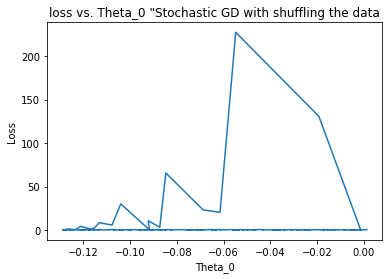

In [54]:
# Plot Theta_0 vs. loss for Stochastic GD for single variable linear regression with shuffling the data
plt.plot(Theta_0_all_Stoch,loss_stoch)
plt.title('loss vs. Theta_0 "Stochastic GD with shuffling the data')
plt.ylabel('Loss')
plt.xlabel('Theta_0')
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

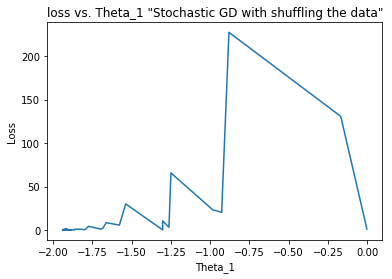

In [55]:
# Plot Theta_1 vs. loss for Stochastic GD for single variable linear regression with shuffling the data
plt.plot(Theta_1_all_Stoch,loss_stoch)
plt.title('loss vs. Theta_1 "Stochastic GD with shuffling the data"')
plt.ylabel('Loss')
plt.xlabel('Theta_1')
plt.show

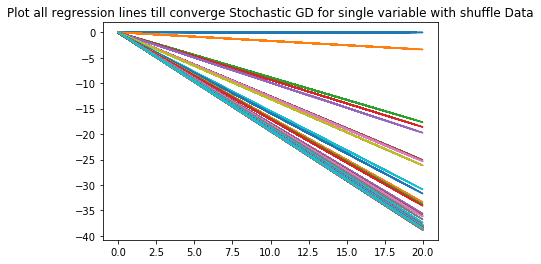

In [56]:
for theta0 , theta1 in zip(Theta_0_all_Stoch,Theta_1_all_Stoch):
    y_hat = H (theta0, theta1, X)
    plt.plot(X,y_hat)
    plt.title('Plot all regression lines till converge Stochastic GD for single variable with shuffle Data')